# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist, bigrams

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load Dataset

In [2]:
true_df = pd.read_excel('./dataset/SatkerData.xlsx')
false_df = pd.read_excel('./dataset/HoaxData.xlsx')

true_df['label'] = 1
false_df['label'] = 0

data = pd.concat([true_df, false_df])

In [3]:
true_df.head()

,Title,Category,Url,Image,Author,Description,Date,Page,label
0,"Gelar Penertiban Nasional, Komitmen Kominfo Aw...",Berita Kominfo,https://www.kominfo.go.id/content/detail/56857...,https://web.kominfo.go.id/sites/default/files/...,Irso,"['Jakarta Pusat, Kominfo – Kementerian Komunik...",05-2024,2,1
1,Awas Hoaks! NIK KTP Jakarta Nonaktif Permanen ...,Berita Kominfo,https://www.kominfo.go.id/content/detail/56830...,https://web.kominfo.go.id/sites/default/files/...,srii003,"['Jakarta Pusat, Kominfo - Beredar tangkapan l...",05-2024,2,1
2,Awas Hoaks! Video Layanan Detoksifikasi Vaksin...,Berita Kominfo,https://www.kominfo.go.id/content/detail/56804...,https://web.kominfo.go.id/sites/default/files/...,doni003,"['Jakarta Pusat, Kominfo - Beredar konten ungg...",05-2024,2,1
3,[Berita Foto] Kominfo - Korsel Sepakati MRA Ke...,Berita Kominfo,https://www.kominfo.go.id/content/detail/56796...,https://web.kominfo.go.id/sites/default/files/...,PeyHS,"['Jakarta Pusat, Kominfo - Kementerian Komunik...",05-2024,2,1
4,Jakarta Tidak Lagi Menjadi Ibu Kota Mulai 2024...,Berita Kominfo,https://www.kominfo.go.id/content/detail/56783...,https://web.kominfo.go.id/sites/default/files/...,srii003,"['Jakarta Pusat, Kominfo - Beredar konten ungg...",05-2024,2,1


In [4]:
false_df.head()

,Title,Category,Url,Image,Author,Description,Date,Page,label
0,[HOAKS] Program Happy Anniversary 58 Tahun Ban...,Hoaks,https://www.kominfo.go.id/content/detail/57170...,https://web.kominfo.go.id/sites/default/files/...,adhi004,['Beredar kabar di media sosial Facebook denga...,06-2024,2,0
1,"[HOAKS] Merokok Mencegah Parkinson, Jantung, A...",Hoaks,https://www.kominfo.go.id/content/detail/57169...,https://web.kominfo.go.id/sites/default/files/...,adhi004,['Beredar sebuah unggahan di media sosial yang...,06-2024,2,0
2,[HOAKS] Undian Livin by Mandiri Periode April-...,Hoaks,https://www.kominfo.go.id/content/detail/57157...,https://web.kominfo.go.id/sites/default/files/...,Viska,['Beredar sebuah unggahan di media sosial Face...,06-2024,2,0
3,[HOAKS] Program Bantuan Usaha Mikro dari Baitu...,Hoaks,https://www.kominfo.go.id/content/detail/57156...,https://web.kominfo.go.id/sites/default/files/...,Viska,['Beredar sebuah unggahan yang menyebut bahwa ...,06-2024,2,0
4,[HOAKS] Kedatangan Transmigran dari Pulau Jawa...,Hoaks,https://www.kominfo.go.id/content/detail/57155...,https://web.kominfo.go.id/sites/default/files/...,Viska,['Beredar sebuah unggahan di media sosial Face...,06-2024,2,0


# Data Preprocessing

In [5]:
data['Title'] = data['Title'].str.lower()
data['Description'] = data['Description'].str.lower()

In [6]:
data['Title'] = data['Title'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
data['Description'] = data['Description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [7]:
data['Title'] = data['Title'].apply(nltk.word_tokenize)
data['Description'] = data['Description'].apply(nltk.word_tokenize)

In [8]:
def remove_specific_words(text, words_to_remove):
    regex_pattern = r'\b(' + '|'.join(words_to_remove) + r')\b'
    clean_text = re.sub(regex_pattern, '', text)
    return clean_text.strip()

words_to_remove = ['hoaks', 'awas']

data['Title'] = data['Title'].apply(lambda x: ' '.join(x))
data['Description'] = data['Description'].apply(lambda x: ' '.join(x))

data['Title'] = data['Title'].apply(lambda x: remove_specific_words(x, words_to_remove))
data['Description'] = data['Description'].apply(lambda x: remove_specific_words(x, words_to_remove))

In [9]:
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

data['Title'] = data['Title'].astype(str)
data['Description'] = data['Description'].astype(str)

data['Title'] = data['Title'].apply(remove_stopwords)
data['Description'] = data['Description'].apply(remove_stopwords)

In [10]:
def stem_text(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

data['Title'] = data['Title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
data['Description'] = data['Description'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

data['Title'] = data['Title'].apply(stem_text)
data['Description'] = data['Description'].apply(stem_text)

# Insight

Jumlah kata yang sering muncul di Berita Real:

[('kominfo', 145), ('berita', 144), ('foto', 140), ('menkominfo', 79), ('menteri', 55), ('disinformasi', 46), ('digit', 41), ('indonesia', 38), ('g', 36), ('hadiri', 34), ('johnni', 30), ('gelar', 22), ('media', 21), ('budi', 20), ('asean', 19), ('ari', 18), ('kerja', 17), ('pemilu', 17), ('dorong', 15), ('publik', 15)]


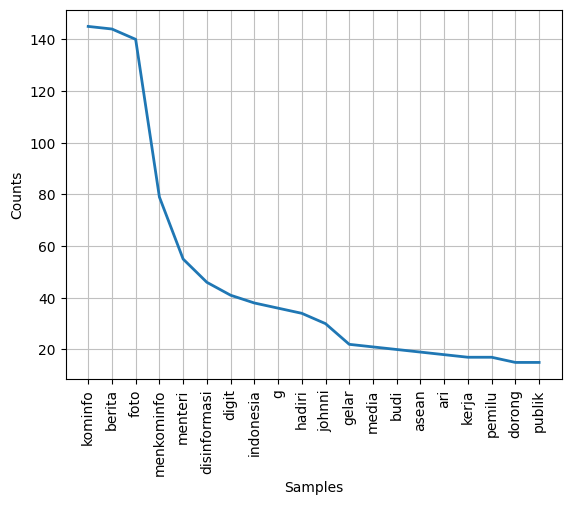

In [11]:
data_true = data[data['label'] == 1]['Title']
true_data = [word for data_true in data[data['label'] == 1]['Title'] for word in data_true]

fdist_true = FreqDist(true_data)
print('Jumlah kata yang sering muncul di Berita Real:\n')
print(fdist_true.most_common(20))

# Plot the frequency distribution of the top 20 words
fdist_true.plot(20, cumulative=False)
plt.show()

Jumlah kata yang sering muncul di Berita Hoax:

[('mengatasnamakan', 120), ('akun', 90), ('whatsapp', 71), ('kabupaten', 44), ('indonesia', 42), ('kota', 39), ('video', 38), ('bank', 32), ('presiden', 31), ('provinsi', 29), ('facebook', 26), ('undian', 25), ('bupati', 23), ('bantuan', 22), ('prabowo', 21), ('rp', 21), ('juta', 21), ('cina', 20), ('jokowi', 19), ('berhadiah', 19)]


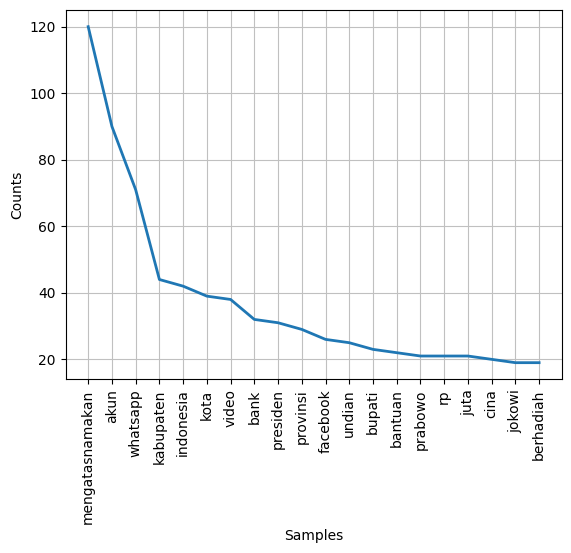

In [12]:
data_hoax = data[data['label'] == 0]['Title']
hoax_data = [word for data_hoax in data[data['label'] == 0]['Title'] for word in data_hoax]

fdist_hoax = FreqDist(hoax_data)
print('Jumlah kata yang sering muncul di Berita Hoax:\n')
print(fdist_hoax.most_common(20))

# Plot the frequency distribution of the top 20 words
fdist_hoax.plot(20, cumulative=False)
plt.show()

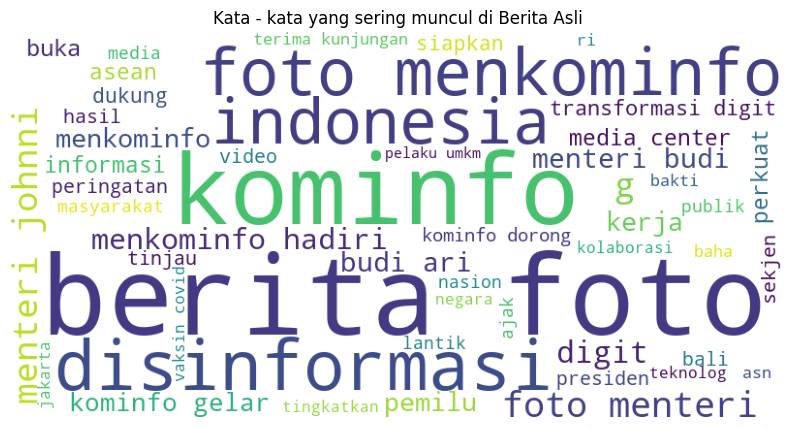

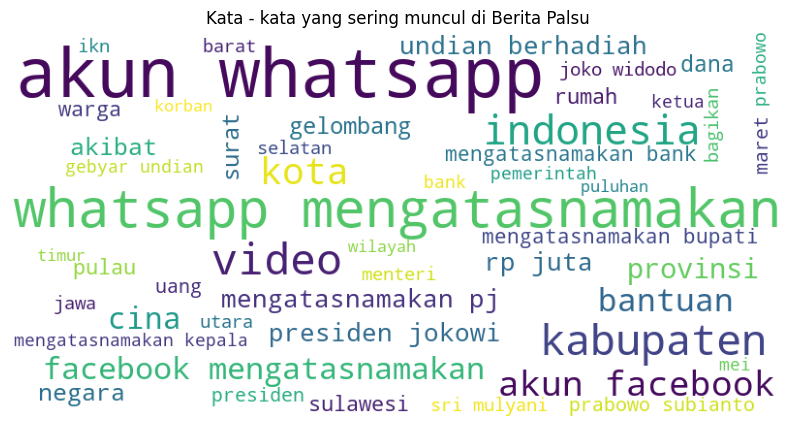

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has been properly loaded

# Generate word cloud for True News Titles
data_true = data[data['label'] == 1]['Title'].apply(' '.join)
wc_true = WordCloud(background_color='white', max_words=50, width=800, height=400)

plt.figure(figsize=(10, 7))
plt.imshow(wc_true.generate(' '.join(data_true)))
plt.title('Kata - kata yang sering muncul di Berita Asli')
plt.axis('off')

# Save the figure
plt.savefig('wordcloud_true_news.png', format='png', dpi=300)
plt.show()  # Show the plot after saving

# Generate word cloud for False News Titles
data_false = data[data['label'] == 0]['Title'].apply(' '.join)
wc_false = WordCloud(background_color='white', max_words=50, width=800, height=400)

plt.figure(figsize=(10, 7))
plt.imshow(wc_false.generate(' '.join(data_false)))
plt.title('Kata - kata yang sering muncul di Berita Palsu')
plt.axis('off')

# Save the figure
plt.savefig('wordcloud_false_news.png', format='png', dpi=300)
plt.show()  # Show the plot after saving
